# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

* **Pandas** for data manipulation and analysis.
- **NumPy** for numerical computing and array operations.
- **Matplotlib's** for creating plots and visualizations.
- **Seaborn** for advanced data visualization.
- **Scikit-learn's** `train_test_split` function for splitting data into training and testing sets.
- **Scikit-learn's** `GridSearchCV` class for hyperparameter tuning using cross-validation.
- **TargetEncoder** from the category_encoders library for encoding categorical variables.
- **LabelEncoder** from scikit-learn for encoding categorical variables as numeric labels.
- **MinMaxScaler** from scikit-learn for feature scaling and normalization.
- **Scikit-learn's** metrics module for evaluating machine learning model performance.



In [2]:
!pip install category_encoders

# Getting the data

In [3]:
df = pd.read_csv('/kaggle/input/car-sales/car_sales_data.csv')
df

,Make,Model,Year,Sales,Predictions
0,acura,TSX,2013,31998,NaN
1,acura,TSX,2012,38035,NaN
2,acura,TSX,2011,30365,NaN
3,acura,NSX,2007,238,NaN
4,acura,NSX,2006,415,NaN
...,...,...,...,...,...
822,volvo,S40,2008,18112,NaN
823,volvo,S40,2007,35634,NaN
824,volvo,V50,2011,2155,NaN
825,volvo,V50,2010,2850,NaN


In [4]:
df.info()
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         827 non-null    object 
 1   Model        827 non-null    object 
 2   Year         827 non-null    int64  
 3   Sales        827 non-null    int64  
 4   Predictions  0 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 32.4+ KB


,count,mean,std,min,25%,50%,75%,max
Year,827.0,2005.777509,5.656112,1993.0,2002.5,2007.0,2010.0,2013.0
Sales,827.0,81156.534462,121744.182619,0.0,9369.0,33497.0,99616.5,911597.0
Predictions,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- **`df.info()`** provides a concise summary of the DataFrame, including column names, data types, non-null counts, and memory usage.
- **`df.describe().transpose()`** computes summary statistics for numerical columns and transposes the results for easier readability.

# Target Endcoding 

In [5]:
Targetenc = TargetEncoder()
values = Targetenc.fit_transform(X = df.Model, y = df.Sales)


**`TargetEncoder`** encodes categorical variables by replacing each category with the mean target value of that category. 

`values = Targetenc.fit_transform(X = df.Model, y = df.Sales)`: 
   - `fit_transform()` method of the `TargetEncoder` class is used to encode the `Model` column.
   - The `X` parameter is set to `df.Model`, which represents the column to be encoded.
   - The `y` parameter is set to `df.Sales`, which represents the target variable used for encoding.
   - The resulting encoded values are stored in the `values` variable.


In [6]:
df

,Make,Model,Year,Sales,Predictions
0,acura,TSX,2013,31998,NaN
1,acura,TSX,2012,38035,NaN
2,acura,TSX,2011,30365,NaN
3,acura,NSX,2007,238,NaN
4,acura,NSX,2006,415,NaN
...,...,...,...,...,...
822,volvo,S40,2008,18112,NaN
823,volvo,S40,2007,35634,NaN
824,volvo,V50,2011,2155,NaN
825,volvo,V50,2010,2850,NaN


In [7]:
# concatenating values with dataframe
df = df.drop('Model',axis = 1)
df = pd.concat([df, values], axis = 1)
df.head

<bound method NDFrame.head of       Make  Year  Sales  Predictions         Model
0    acura  2013  31998          NaN  73790.003414
1    acura  2012  38035          NaN  73790.003414
2    acura  2011  30365          NaN  73790.003414
3    acura  2007    238          NaN  66502.158150
4    acura  2006    415          NaN  66502.158150
..     ...   ...    ...          ...           ...
822  volvo  2008  18112          NaN  69031.158309
823  volvo  2007  35634          NaN  69031.158309
824  volvo  2011   2155          NaN  69170.359243
825  volvo  2010   2850          NaN  69170.359243
826  volvo  2009   5671          NaN  69170.359243

[827 rows x 5 columns]>

In [8]:
df = df.drop(['Predictions'], axis=1)

In [9]:
df.Model.nunique()

187

In [10]:
label_encoder = LabelEncoder()
df['Make'] = label_encoder.fit_transform(df['Make'])




1. `LabelEncoder()`: Initializes an instance of the `LabelEncoder` class.

2. `df['Make'] = label_encoder.fit_transform(df['Make'])`:
   - `fit_transform()` method of the `LabelEncoder` class is used to encode the 'Make' column.
   - The `fit_transform()` method fits the encoder to the 'Make' column and transforms the categorical values into numerical labels.
   - The resulting encoded labels are assigned back to the 'Make' column in the DataFrame `df`.

The `LabelEncoder` is used to convert categorical variables into numeric labels, where each unique category is assigned a unique integer value

In [11]:
df

,Make,Year,Sales,Model
0,0,2013,31998,73790.003414
1,0,2012,38035,73790.003414
2,0,2011,30365,73790.003414
3,0,2007,238,66502.158150
4,0,2006,415,66502.158150
...,...,...,...,...
822,23,2008,18112,69031.158309
823,23,2007,35634,69031.158309
824,23,2011,2155,69170.359243
825,23,2010,2850,69170.359243


# Viz

<Axes: >

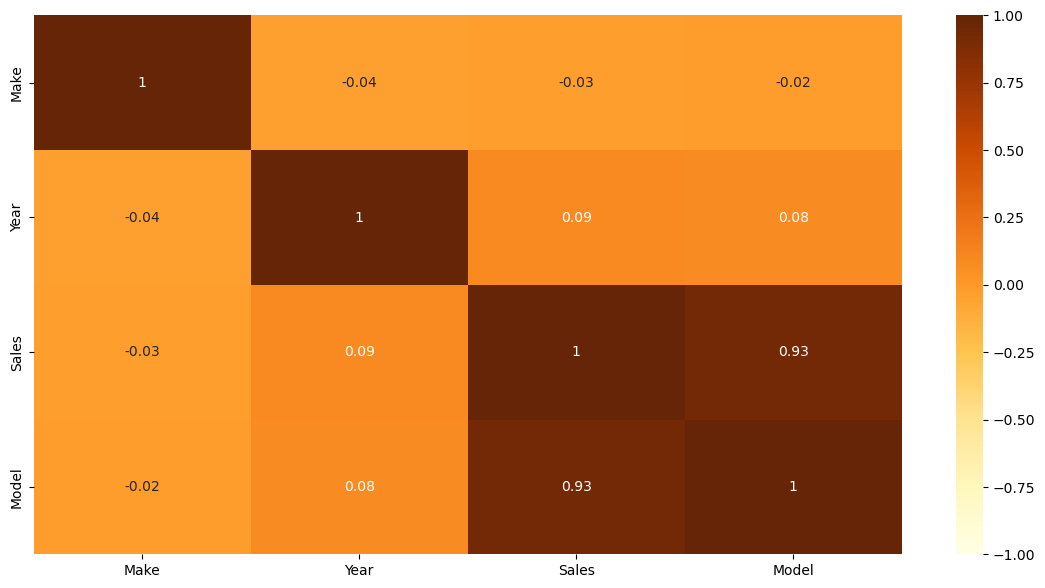

In [12]:
fig, ax = plt.subplots(figsize = (14,7))
corr = df.corr().round(2)
sns.heatmap(corr, annot = True, ax=ax, vmin=-1, vmax=1, center=0, cmap='YlOrBr')

array([[<Axes: title={'center': 'Make'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Model'}>, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

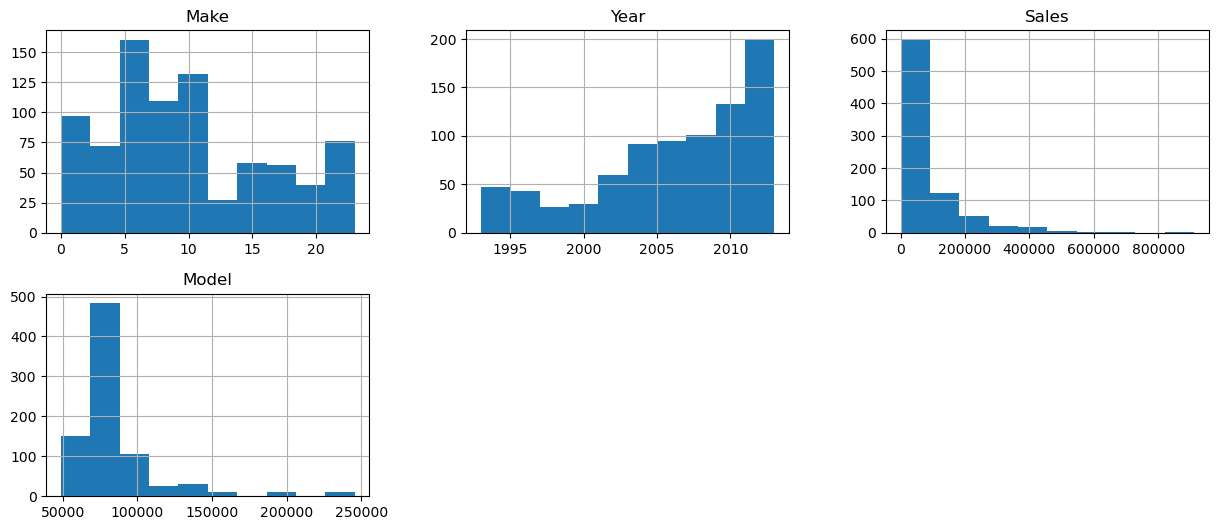

In [13]:
df.hist(figsize=(15,30),layout=(9,3))

In [14]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Make    827 non-null    int64  
 1   Year    827 non-null    int64  
 2   Sales   827 non-null    int64  
 3   Model   827 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 26.0 KB


,Make,Year,Sales,Model
0,0,2013,31998,73790.003414
1,0,2012,38035,73790.003414
2,0,2011,30365,73790.003414
3,0,2007,238,66502.158150
4,0,2006,415,66502.158150


In [15]:
scaled_data = MinMaxScaler().fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled

,Make,Year,Sales,Model
0,0.0,1.00,0.035101,0.127097
1,0.0,0.95,0.041723,0.127097
2,0.0,0.90,0.033310,0.127097
3,0.0,0.70,0.000261,0.090050
4,0.0,0.65,0.000455,0.090050
...,...,...,...,...
822,1.0,0.75,0.019868,0.102906
823,1.0,0.70,0.039090,0.102906
824,1.0,0.90,0.002364,0.103614
825,1.0,0.85,0.003126,0.103614


**`scaled_data = MinMaxScaler().fit_transform(df)`:**
   - `fit_transform()` method of the `MinMaxScaler` class is used to scale the values in `df`.
   - The `fit_transform()` method fits the scaler to the data and then transforms the data using min-max scaling.

**`df_scaled = pd.DataFrame(scaled_data, columns=df.columns)`:** 
   - The scaled data is used to create a new DataFrame called `df_scaled`.
   - The `pd.DataFrame()` function is used to create a DataFrame from the scaled data.
   - The `columns` parameter is set to `df.columns` to ensure that the column names are preserved in the new DataFrame.

The resulting **`df_scaled`** DataFrame contains the scaled values of `df`, where each feature's values are scaled to a range between 0 and 1 using the min-max scaling technique.

<Axes: >

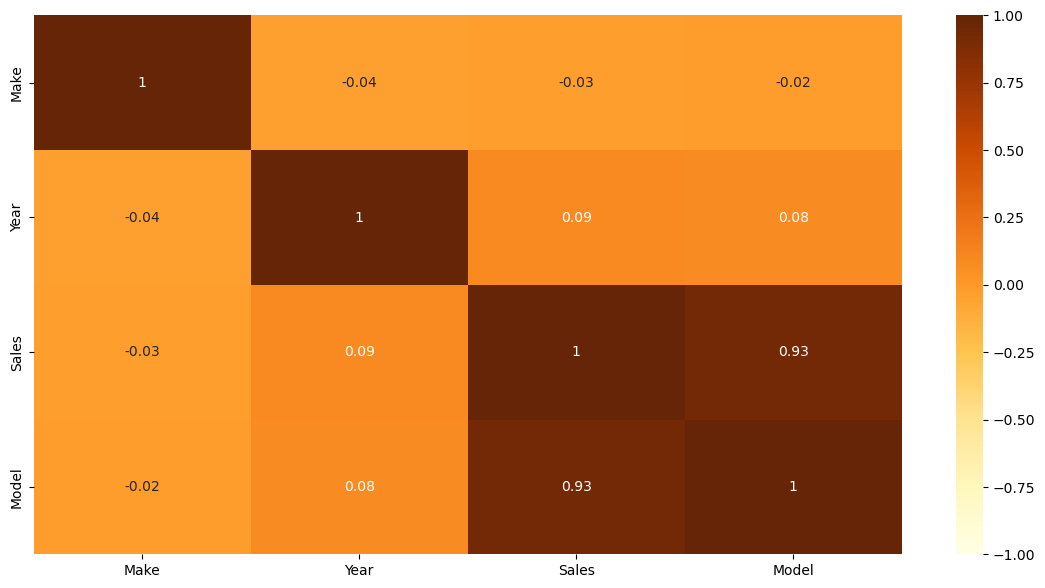

In [16]:
fig, ax = plt.subplots(figsize = (14,7))
corr = df.corr().round(2)
sns.heatmap(corr, annot = True, ax=ax, vmin=-1, vmax=1, center=0, cmap='YlOrBr')

In [17]:
Y = df_scaled['Sales']
X = df_scaled.drop(['Sales'], axis=1)
#Dependent and independent variable 

In [18]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state=10, shuffle=True)

print("Size of X_train DataFrame: ", X_train.shape)
print("Size of X_val DataFrame: ", X_val.shape)
print("Size of Y_train DataFrame: ", Y_train.shape)
print("Size of Y_val DataFrame: ", Y_val.shape)

Size of X_train DataFrame:  (620, 3)
Size of X_val DataFrame:  (207, 3)
Size of Y_train DataFrame:  (620,)
Size of Y_val DataFrame:  (207,)


# Models

In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, Y_train)
Y_pred_linear = reg.predict(X_val)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_val, Y_pred_linear)
print("linear mse: ",mse)
print('Training Accuracy r2: ', metrics.r2_score(Y_val, Y_pred_linear))


linear mse:  0.0020974203824056853
Training Accuracy r2:  0.8957172642946611


In [20]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1).fit(X_train,Y_train)
Y_pred_GBR = GBR.predict(X_val)
mse_GBR = mean_squared_error(Y_val,Y_pred_GBR)
print("GBR mse: ",mse_GBR)

print('Training Accuracy r2: ', metrics.r2_score(Y_val, Y_pred_GBR))


GBR mse:  0.0012844732093591459
Training Accuracy r2:  0.9361366079323817


In [21]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=100).fit(X_train,Y_train)
Y_pred_RFR = RFR.predict(X_val)
mse_RFR = mean_squared_error(Y_val,Y_pred_RFR)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_val, Y_pred_RFR)
print("RFR mse: ",mse_RFR)
print("mae_RFR: ",mae)
print('Training Accuracy r2: ', metrics.r2_score(Y_val, Y_pred_RFR))



RFR mse:  0.001170274306753893
mae_RFR:  0.021055433910459814
Training Accuracy r2:  0.9418145226118243


In [22]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor().fit(X_train,Y_train)
Y_pred_DTR = DTR.predict(X_val)
mse_DTR = mean_squared_error(Y_val,Y_pred_DTR)
print("DTR mse: ",mse_DTR)
print('Training Accuracy r2: ', metrics.r2_score(Y_val, Y_pred_DTR))



DTR mse:  0.0017761777534271452
Training Accuracy r2:  0.9116892937724302


In [23]:
from xgboost import XGBRegressor

XGR = XGBRegressor(n_estimators=100, learning_rate=0.1).fit(X_train,Y_train)
Y_pred_XGR = XGR.predict(X_val)
mse_XGR = mean_squared_error(Y_val,Y_pred_XGR)
print("XGR mse: ",mse_XGR)
print('Training Accuracy r2: ', metrics.r2_score(Y_val, Y_pred_XGR))


XGR mse:  0.001171443480973066
Training Accuracy r2:  0.9417563918302632


# Grid Search

In [24]:
rf_reg = RandomForestRegressor()

param = {'n_estimators': [50, 100, 200],
        'criterion': ['squared_error', 'absolute_error','friedman_mse','poisson'],
        }

rf_reg_cv = GridSearchCV(rf_reg, param_grid = param, scoring = 'r2', cv=5, verbose=2)
rf_reg_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...........criterion=squared_error, n_estimators=50; total time=   0.1s
[CV] END ...........criterion=squared_error, n_estimators=50; total time=   0.1s
[CV] END ...........criterion=squared_error, n_estimators=50; total time=   0.1s
[CV] END ...........criterion=squared_error, n_estimators=50; total time=   0.1s
[CV] END ...........criterion=squared_error, n_estimators=50; total time=   0.1s
[CV] END ..........criterion=squared_error, n_estimators=100; total time=   0.2s
[CV] END ..........criterion=squared_error, n_estimators=100; total time=   0.2s
[CV] END ..........criterion=squared_error, n_estimators=100; total time=   0.3s
[CV] END ..........criterion=squared_error, n_estimators=100; total time=   0.2s
[CV] END ..........criterion=squared_error, n_estimators=100; total time=   0.2s
[CV] END ..........criterion=squared_error, n_estimators=200; total time=   0.5s
[CV] END ..........criterion=squared_error, n_es

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

1. **`RandomForestRegressor()`:**
   - Initializes an instance of the `RandomForestRegressor` class, which represents the random forest regression model.

2. **`param`:**
   - Defines a dictionary `param` that specifies the hyperparameter grid for the grid search.
   - The hyperparameters to be tuned are `'n_estimators'` (number of trees in the random forest) and `'criterion'` (impurity criterion for splitting).

3. **`GridSearchCV`:**
   - Initializes an instance of the `GridSearchCV` class, which performs a grid search with cross-validation.
   - The model to be tuned is specified as `rf_reg`, the hyperparameter grid is set as `param`, and the scoring metric is `'r2'` (coefficient of determination).
   - `cv=5` specifies 5-fold cross-validation, dividing the data into 5 subsets for training and evaluation.
   - `verbose=2` prints detailed progress and results of the grid search.

4. **`rf_reg_cv.fit(X_train, Y_train)`:**
   - Fits the grid search model to the training data `X_train` and `Y_train`.
   - The grid search algorithm will iterate through all possible combinations of hyperparameters specified in `param` and evaluate the model's performance using cross-validation.
   - Once the grid search is complete, the best combination of hyperparameters will be determined based on the scoring metric specified.
   - The fitted grid search model is stored in `rf_reg_cv`.

After executing this code, you can access the best hyperparameters and model performance metrics from `rf_reg_cv.best_params_` and `rf_reg_cv.best_score_`, respectively.

In [25]:
rf_reg = RandomForestRegressor(**rf_reg_cv.best_params_)
rf_reg.fit(X_train, Y_train)
Y_pred_rf_train = rf_reg.predict(X_train)
Y_pred_rf_val = rf_reg.predict(X_val)

r2_rf_train = metrics.r2_score(Y_train, Y_pred_rf_train) 
r2_rf_val = metrics.r2_score(Y_val, Y_pred_rf_val)

print("R2 score for Random Forest training set: ", r2_rf_train)
print("R2 score for Random Forest validation set: ", r2_rf_val)

R2 score for Random Forest training set:  0.9814949167760675
R2 score for Random Forest validation set:  0.9447040225788937
